# Image Classification with ```scikit-learn```

## Import packages

In [2]:
import os
import sys
sys.path.append(os.path.join(".."))

# Import teaching utils
import numpy as np
import utils.classifier_utils as clf_util

# Import sklearn metrics
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Fetch data

We're using something called the MNIST dataset, a very famous dataset in image classification. It even has it's own [Wikipedia page](https://en.wikipedia.org/wiki/MNIST_database)!

For this session, we're just fetching the data from a website called [OpenML](https://www.openml.org/), an open collection of datasets and experiments. I'd recommend digging around in there and seeing what kinds of datasets are available for experiments - there might be something for an exam project.

We load the data here using a function from ```scikit-learn``` which takes the data from OpenML and assigns it directly to two variables.

In [3]:
X, y = fetch_openml('mnist_784', # dataset name
                    version=1, 
                    parser="auto", # how to parse the data x and y
                    return_X_y=True) # x = data. Y = labels

                    # MNIST Dataset from OpenML
                    # Scikit learn can fetch data from OpenML
                    # 

Let's first check what the labels are in our data. This is what we're trying to predict.

In [4]:
sorted(set(y)) # 0-9

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Depending on the versions of ```pandas``` and ```sklearn``` that you're using, you may need to expressly convert these to ```numpy``` arrays.

In [6]:
X = np.array(X) # going from pandas dataframe to a numpy array 
y = np.array(y) # going from pandas dataframe to a numpy array.

__Predifine classes and number of classes__

We're going to start by making variables which contain the list of classes, and the total number of classes. This isn't strictly necessary, but we'll be using them later on in our notebook.

In [7]:
classes = sorted(set(y)) # name of y to classes
nclasses = len(classes) # length of classes 

**Question!** 

What does the data look like? What can you tell me about each individual image?

In [8]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

__Plot random sample__

I've created a util function called ```plot_sample()``` which simply plots a random sample of the data.

**Group task:** Go inspect the ```plot_sample()``` function - can you explain what it does and how it works?
 - Takes 5 random images of each class

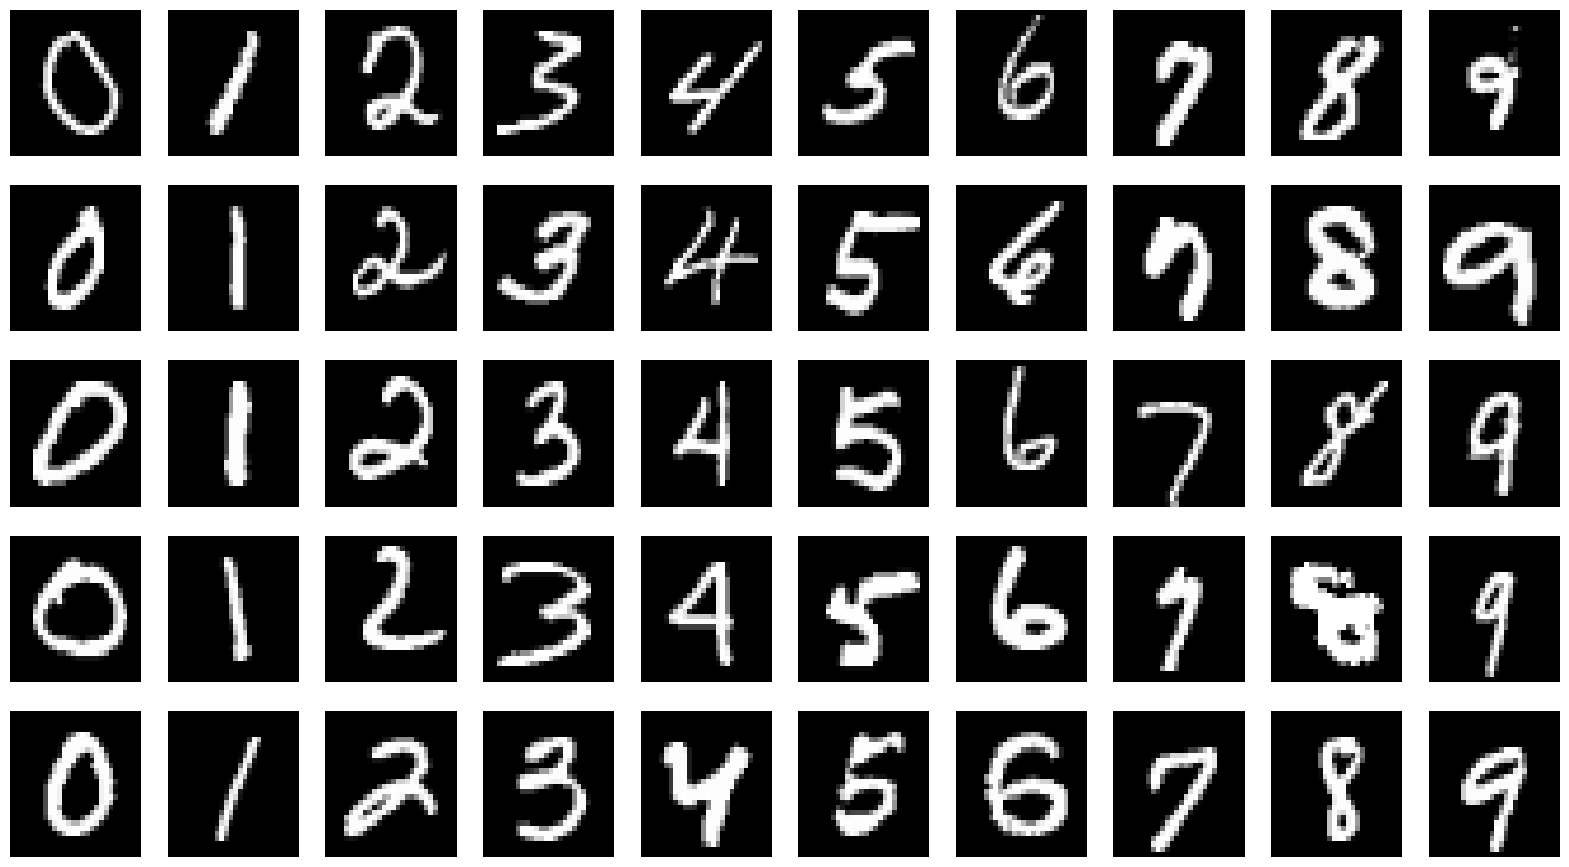

In [9]:
clf_util.plot_sample(X, y, classes, 5)

## Create training and test dataset

We then use our ```train_test_split()``` function to split the data into a training and a test set.

Notice that we're not defining this split in terms of percentages, but instead using whole numbers. We have 7500 training examples, and 2500 test examples.

**Group task:** What effect does it have if you make the training split larger or smaller? Test it!
- The bigger the test size, the more accurate the model becomes  

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42,
                                                    train_size=7500, # manully defining train and test split 7500
                                                    test_size=2500)  # 2500

As with our simple image search algorithm, it's a good idea to scale our data when working with images.

Previously, we saw how to do what was called ```MinMax`` scaling. A simpler approach - and often just as effective - is simple to divide by the maximum possible value.

In [45]:
#scaling the features
X_train_scaled = X_train/255.0 # compressing number size. instead of 0-255. now it is 0-1
X_test_scaled = X_test/255.0

## Train a logistic regression model

Next, I'm defining my Logistic Regression classifier. I've included a number of parameters here which we haven't yet looked at.

**Group task:** Check out the ```scikit-learn``` documentation for ```LogisticRegression()``` and read how each of the parameters here are defined. Can you understand what each of them do? Try changing some of them to see how it affects performance!
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 
- tol = Tolerance for stopping criteria.
- solver = algorithm chosen for optimization. saga is for large datasets 
- multi_clas = binary. Multinomial For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution
- fit = chosen training data

In [46]:
clf = LogisticRegression(tol=0.1, #
                         solver='saga',#
                         multi_class='multinomial').fit(X_train_scaled, y_train) #

When our model is finished learning, we have a collection of weights that the model has learned.

**Group task:** Before running the following cell, try to figure out what shape this matrix will be.

In [47]:
#to check the shape of the coefficient (weights) matrix
clf.coef_.shape

(10, 784)

## Interpreting the coefficients

We can plot the coefficients for our model, showing which 'features' are most informative when it comes to predicting each class

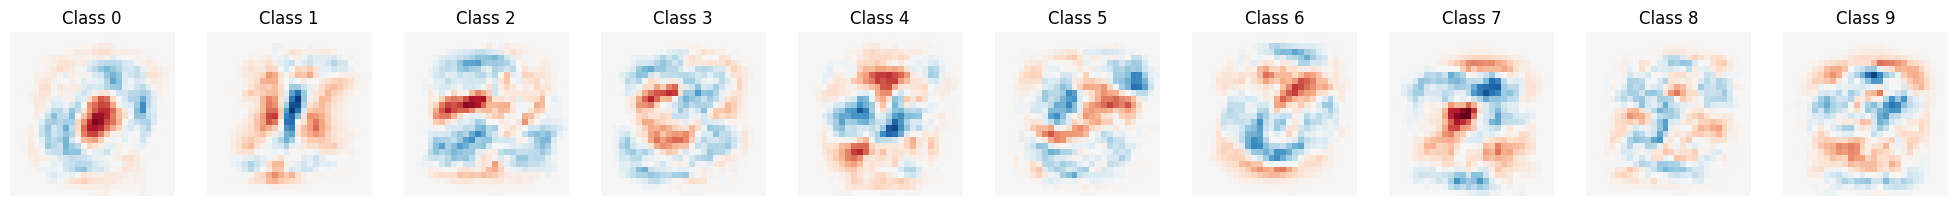

In [48]:
clf_util.plot_coefs(clf.coef_, nclasses)

## Individual predictions

We can then use this model to predict the class of an individual data point.

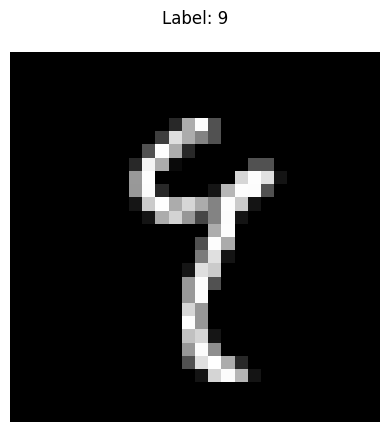

In [51]:
clf_util.plot_individual(X_test_scaled, 
                         y_test, 
                         59) # pick a random image. 
                         # take the test data.

We can compute the conditional probability for each class and then plot the probability distribution.

## Show the distribution of probabilities

I think that this is class 7


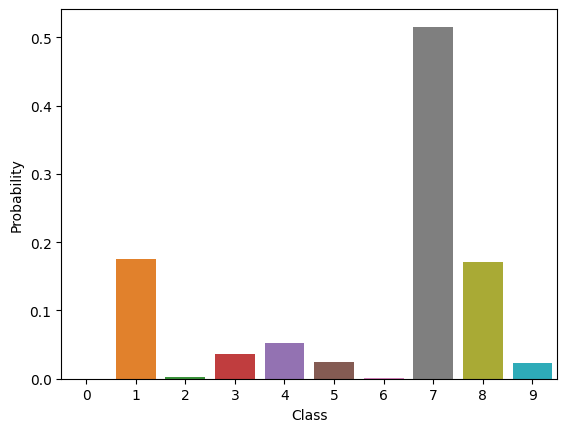

In [52]:
clf_util.plot_probs(X_test_scaled, 
                    59, # pick an image
                    clf,  # trained classifier model
                    classes) # names of classes

We can find the class with the highest probability. 

If this matches the actual label for the first test sample, then our prediction is correct.

## Accuracy

We can calculate predictions for all data the scaled test data.

In [28]:
y_pred = clf.predict(X_test_scaled) # all predictions 

We then calculate metrics for accuracy based on comparing the predicted labels with the actual labels.

In [29]:
#method 2
accuracy = accuracy_score(y_test, y_pred) # scikit learn functoin accuracy score
print(accuracy)

0.9024


In [30]:
cm = metrics.classification_report(y_test, y_pred)
print(cm) # You can see that 8 and 5 have the worst scores. f1
# 1 has the best score.

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       251
           1       0.93      0.97      0.95       263
           2       0.88      0.87      0.87       233
           3       0.86      0.90      0.88       289
           4       0.89      0.92      0.90       203
           5       0.88      0.87      0.87       247
           6       0.93      0.94      0.93       254
           7       0.90      0.90      0.90       260
           8       0.90      0.81      0.85       243
           9       0.92      0.88      0.90       257

    accuracy                           0.90      2500
   macro avg       0.90      0.90      0.90      2500
weighted avg       0.90      0.90      0.90      2500



This can be visualised using a confusion matrix

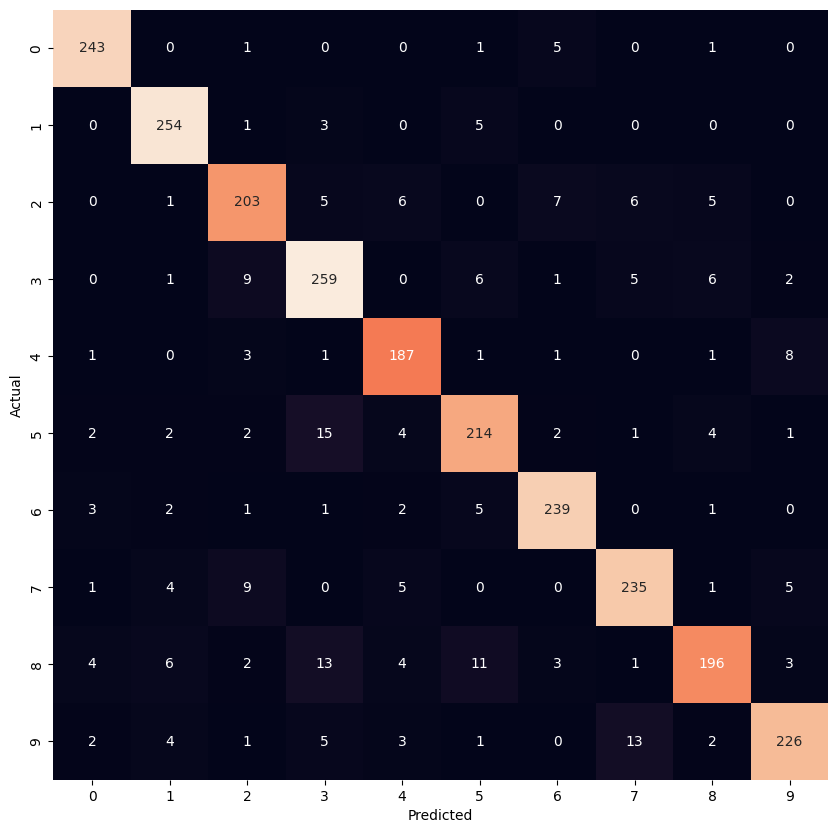

In [31]:
clf_util.plot_cm(y_test, y_pred, normalized=False)

We can also normalize the confusion matrix to show percentages instead of raw values

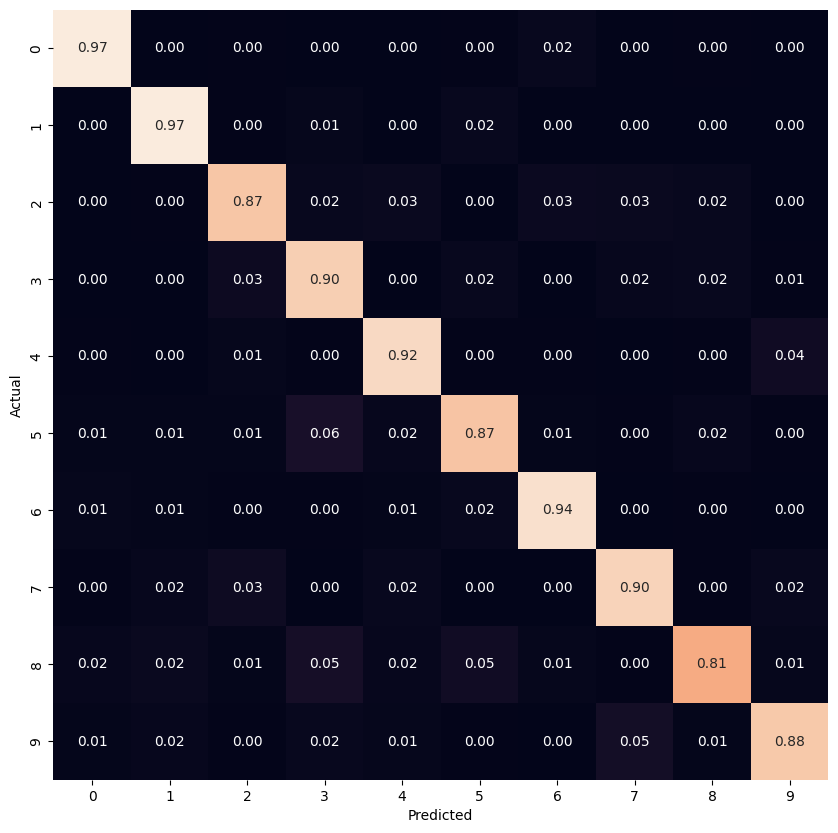

In [32]:
clf_util.plot_cm(y_test, y_pred, normalized=True)

## Test on new data - Looking at ross's screen

In [33]:
import cv2
import matplotlib.pyplot as plt
from utils.imutils import jimshow, jimshow_channel
#pip install opencv-python

Question: Where should scaling come in this pipeline?  Does it matter at which point you do the scaling?

In [38]:
test_image = cv2.imread(os.path.join("..", "data", "img", "autodraw 3_3_2023.png")) # loading in the image 

Use bitwise not to invert regular grayscale

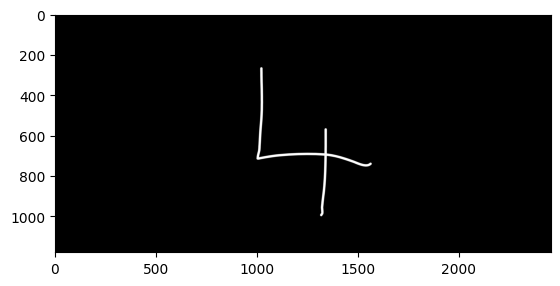

In [39]:
gray = cv2.bitwise_not(cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)) # make the image gray scaled 
# bitwise_not = invert black and white 
plt.imshow(gray, cmap=plt.cm.gray)

Resize down to 28x28 image

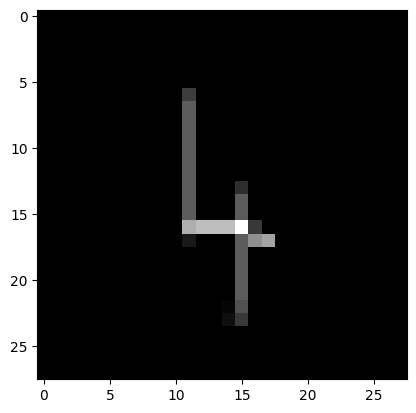

In [40]:
compressed = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
plt.imshow(compressed, cmap=plt.cm.gray)

### Qualitative evaluation

I think that this is class 4


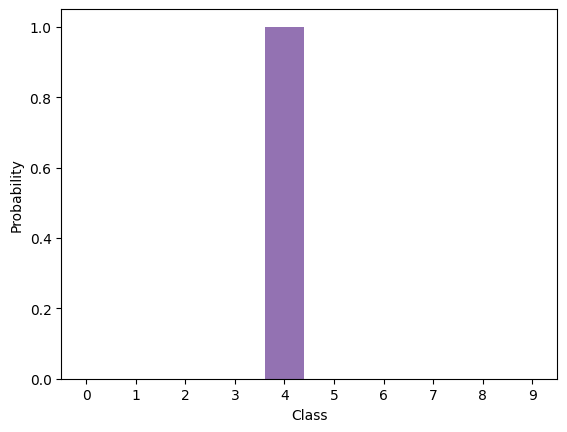

In [41]:
clf_util.predict_unseen(compressed, clf, classes)

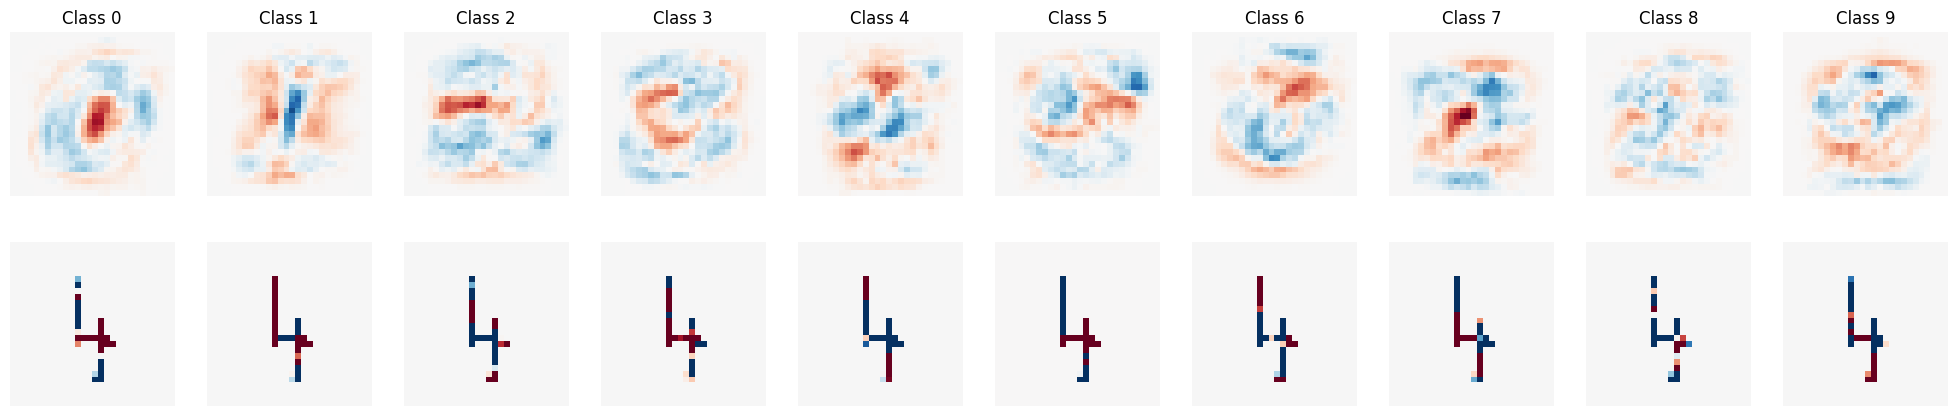

In [42]:
clf_util.prediction_coefficients(compressed, clf, classes)

## Tasks

- Go back to the start of this notebook and work through again in groups. Stop at the point where it says "Group Tasks" and work on this in groups of 3 or 4. 
  - If you get stuck, you can skip ahead to the next one, but try to cover all of them.
- Try the same thing using the ```MLPCLassifier()``` from ```scikit-learn```
  - If someone from your group wasn't there, explain to them how it works!